### IDs:
Insert yours IDs to the cell below

ID #1:322156159

ID #2:034537969

Ilia Kohanovski Ido Hadanny


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Data viz - practical

Load Boston dataset from sklearn
1. Produce a histogram of the apartments’ price. 
2. Produce a box plot of the apartments’ price. 
3. Produce a correlation matrix of all the features.
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JoinPlot)
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [3]:
from sklearn.datasets import load_boston
boston = load_boston(return_X_y=True)
features,prices = boston
feature_names = load_boston(return_X_y=False).feature_names

In [4]:
#1-3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams['figure.figsize'] = (12.0/3, 8.0/3) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
sns.set()
plt.figure()
plt.hist(prices)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.figure()
plt.boxplot(prices);
plt.ylabel('Price')

df_features = pd.DataFrame(features)
df_features.columns = feature_names
features_corr = df_features.corr()

plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.figure()
sns.heatmap(features_corr, cmap='RdYlBu', annot=True);

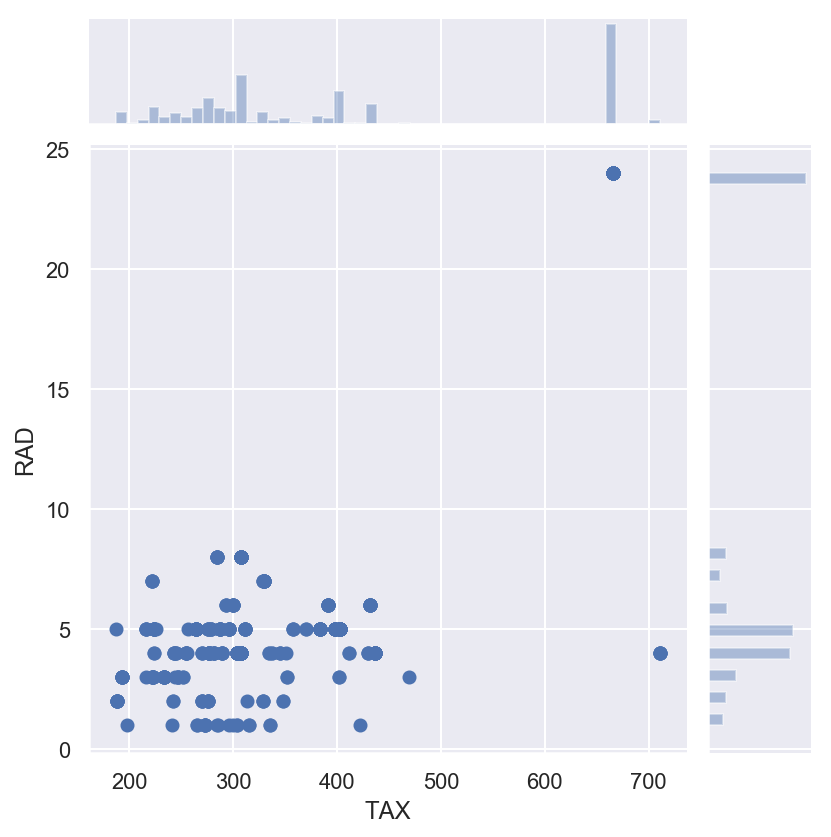

In [5]:
#4
sns.set()
# -features_corr.min().min() is smaller than max
features_corr[features_corr==1] = 0
rmax = features_corr.max().idxmax()
cmax = features_corr[rmax].idxmax()
sns.jointplot(x=cmax, y=rmax, data=df_features, marginal_kws=dict(bins=50));

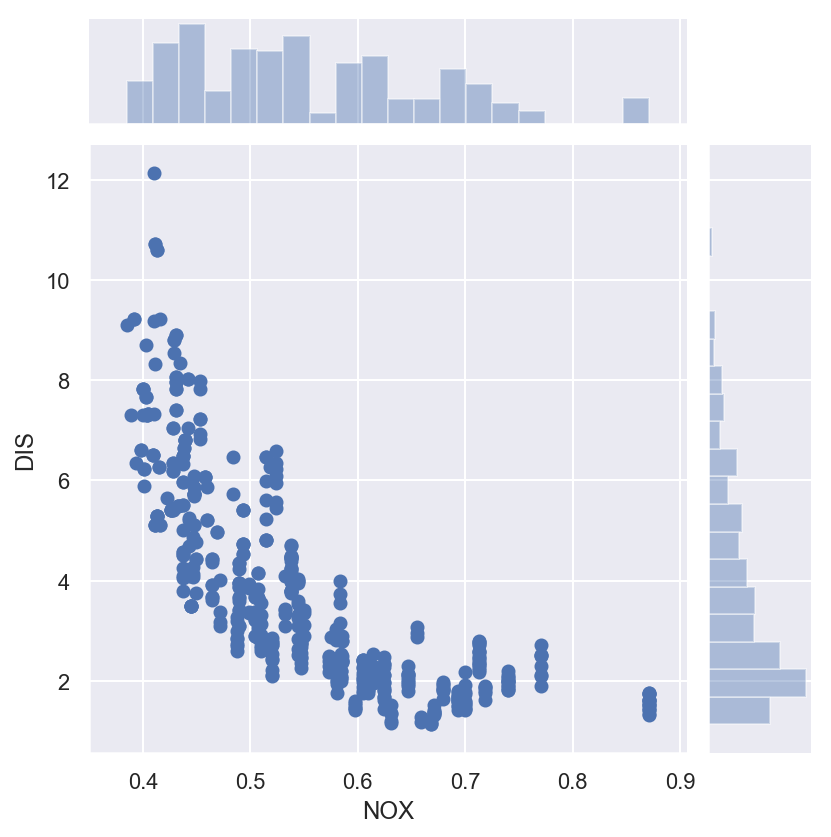

In [6]:
sns.jointplot(x='NOX', y='DIS', data=df_features, marginal_kws=dict(bins=20));

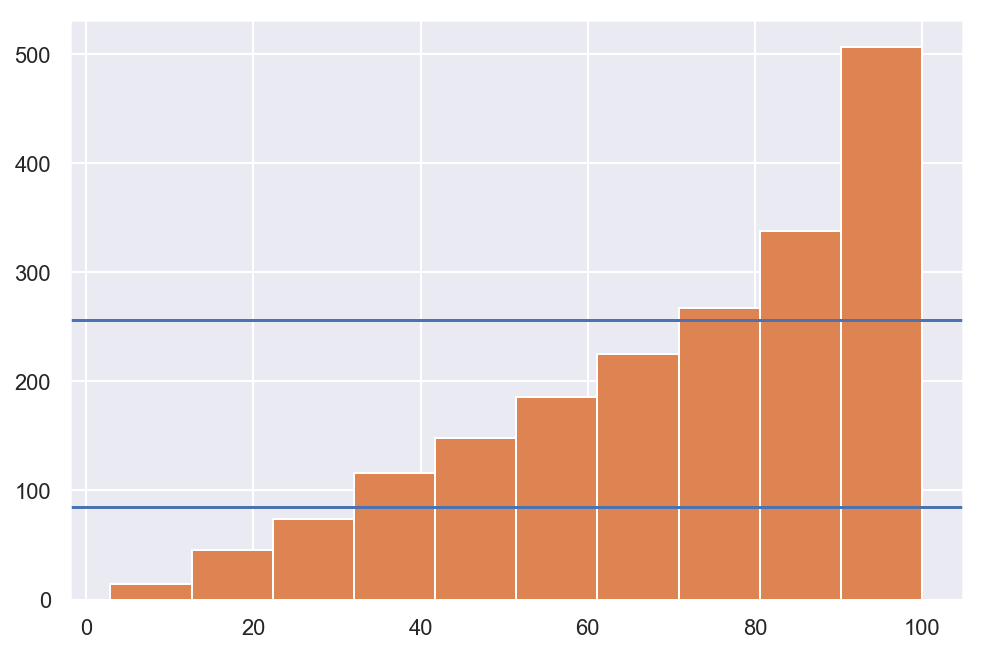

In [7]:
#5
plt.rcParams['figure.figsize'] = (12.0/1.5, 8.0/1.5) # set default size of plots
n = df_features['AGE'].hist(cumulative=True) #age
values,_,_ = plt.hist(df_features['AGE'],cumulative=True);
plt.axhline(np.percentile(values,25));
plt.axhline(np.percentile(values,75));

1) Nitric oxides concentration have a very high negative correlation with the distance to five Boston employment centres.

2) There's one house that have incredibly much more "index of accessibility to radial highways" than the others in this data-set. 

### Question 2 - Gaussian mixtures

In this question N(μ, σ2) stands for a normal distribution with mean μ and variance σ2. <br>
Fred, Mel and Sid are repair technicians who work for Randobezeq – a phone company. <br>
* Fast Fred takes time which is distributed as N(40, 16) to repair a telephone line failure at a customer’s home.
* Medium Mel takes time which is N(45, 36) for the same task.
* Slow Sid takes time which is N(50, 64) for the same task.

#### 2.A

Fred is due to arrive to repair your phone at 11AM tomorrow. How confident can you be that you will be done by 11:45? 

In [8]:
import scipy.stats as stats
str(round(stats.norm(40,4).cdf(45)*100,2))+'%'


'89.44%'

When a customer in North Randomistan orders a repair, there is a 40% chance Fred will do the work and 30% each that Mel or Sid will do the work. 

#### 2.B

What is the distribution of the duration of repair in North Randomistan?

The Gaussian mixture with weights 0.4,0.3,0.3 for N(40,16),N(45,36),N(50,64) approprietally

f(x) = 0.4*f1(x)+0.3*f2(x)+0.3*f3(x) where f1,f2,f3 are Normal distributions with params above


#### 2.C
Let Φ denote the CDF of a standard normal random variable. Use Φ to express the CDF of the duration of a repair in North Randomistan.

The CDF of Gaussian Mixtures is weighted average of CDFs for every Gaussian in the mixture. The CDF of x for one Gaussian $N(\mu,\vartheta)$ is equals to $Φ(\frac{x-\mu}{\vartheta})$
Therefore the CDF of the mixture is $$0.4\cdotΦ(\frac{x-40}{4})+0.3\cdotΦ(\frac{x-45}{6})+0.3\cdotΦ(\frac{x-50}{8})$$

#### 2.D

If the repair starts at 11AM, what is the earliest time for which the customer can assume, at a 95% certainty, that the repair will be already done?

In [9]:
def to_print(value):
    print(str(round(value*100,2))+'%')

def prob(x):
    F1 = stats.norm(40,4).cdf(x)
    F2 = stats.norm(45,6).cdf(x)
    F3 = stats.norm(50,8).cdf(x)
    return 0.4*F1+0.3*F2+0.3*F3

print(prob(58),prob(59))
    

0.9478630227482421 0.9579666394370668


After 59 minutes, i.e. at 11:59

### Question 3 - Gaussian mixtures – parameter estimation and generation

Consider the data provided in GMD.xlsx
Assume that the data comes from a Gaussian mixture distribution (GMD). Furthermore, assume that μ1=0 and that σ1=σ2=1.
Read the data and answer the following questions.

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

In [10]:
#The data
series = pd.read_excel('./GMD.xlsx')[0.5055]

#### First way is just by analysing the histogram of the data
It is not very precious way and not allways will work well, but very quick and easy, and can be used for the first approximation

bins [-2.5611  -2.08147 -1.60184 -1.12221 -0.64258 -0.16295  0.31668  0.79631
  1.27594  1.75557  2.2352   2.71483  3.19446  3.67409  4.15372  4.63335
  5.11298  5.59261  6.07224  6.55187  7.0315 ]
values [  1  10  26  29  36  37  31  20  16  36  48  68 153 154 150  85  59  26
  12   2]


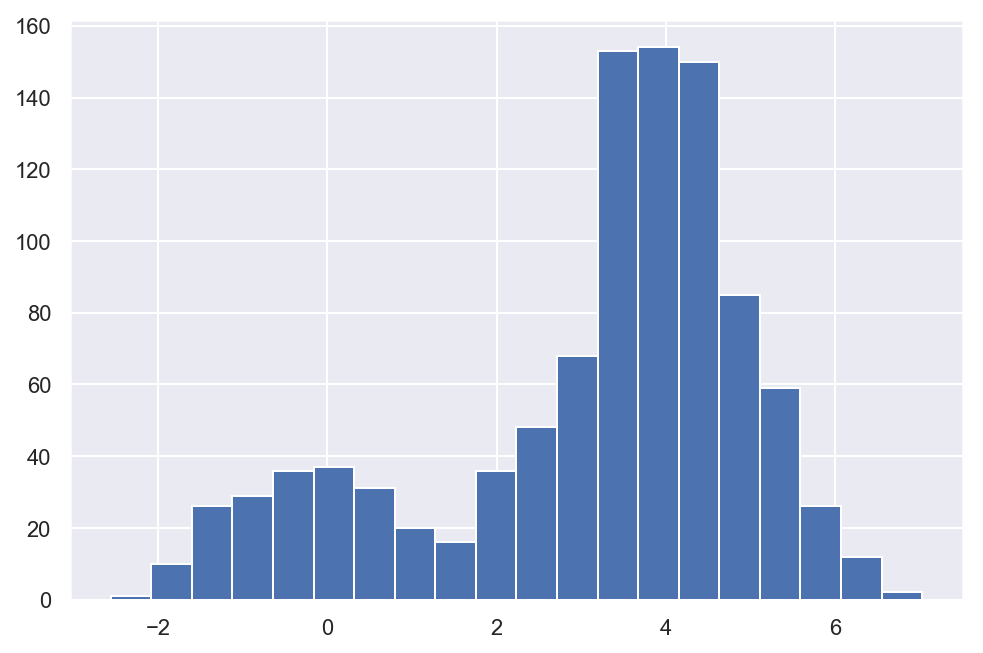

In [11]:
series.hist(bins=20);
values,bins = np.histogram(series,bins=20)
print('bins',bins)
print('values',values)

We can see on the graph that it have 2 local maximas, one about 0 and one about 4. These are approximate μ values (Gaussians have maximas on means). Therefore μ2$\approx$4

For estimating weights of Gaussians, we can check how differ the "humps" of each Gaussian. By eye the second hump is about 4-5 times bigger, so weights are about 0.2,0.8

#### The second way: EM algorithm


In [15]:
# EM algorithm

def r(x,k,w,m,s):
    nominator = w[k]*stats.norm(m[k],s[k]).pdf(x)
    denominator = w[0]*stats.norm(m[0],s[0]).pdf(x) + w[1]*stats.norm(m[1],s[1]).pdf(x)
    return nominator/denominator

def step(xs,w,m,s):
    r0s = [r(x,0,w,m,s) for x in xs]
    new_w0 = np.average(r0s)
    new_m1 = (xs*(1-np.array(r0s))).mean()/(1-new_w0)
    
    neww =(new_w0,1-new_w0)
    newm = (0,new_m1)
    return (neww,newm,s)
 
#init params
# m1=0,s1=s2=1
w = [0.5,0.5]
m = [0,0]
s = [1,1]

for i in range(1,40):
    neww,newm,news = step(series,w,m,s)
#     print(neww,newm,news)
    if np.isclose(neww[0],w[0]) and np.isclose(newm[1],m[1]):
        print('iterations: ',i)
        print('w0: ',w[0], 'w1: ',w[1], 'm1: ',m[1])
        break
    w,m,s=(neww,newm,news)

iterations:  9
w0:  0.20646082277060934 w1:  0.7935391772293907 m1:  3.965491393531479


#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

the limits that were chosen are mean+-3*std.dev that guarantees that 99.7% of the data is in


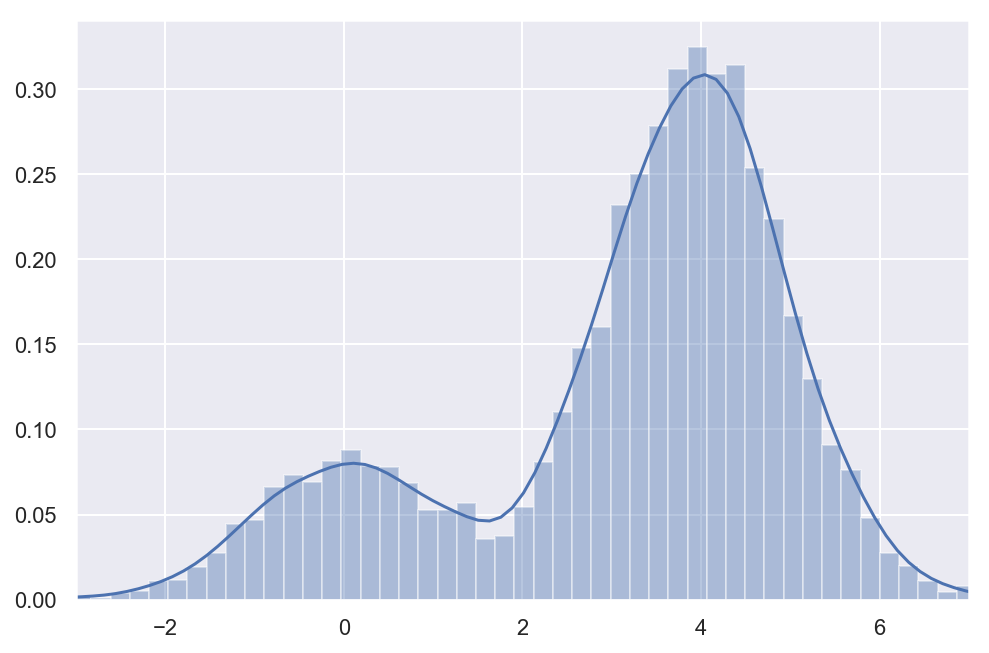

In [14]:
first_gaussian = stats.norm.rvs(loc=0, scale=1, size=10000)
second_gaussian = stats.norm.rvs(loc=newm[1], scale=1, size=10000)
# create the gmm data
gmm_data = []
for i in range(10000):
    p = stats.uniform.rvs(size=1)
    if p < neww[0]:
        gmm_data.append(np.random.choice(a=first_gaussian, size=1))
    else:
        gmm_data.append(np.random.choice(a=second_gaussian, size=1))
sns.distplot(gmm_data)
plt.xlim(0-3,4+3)
print('the limits that were chosen are mean+-3*std.dev that guarantees that 99.7% of the data is in')

#### 3.C
Describe two ways for generating data for a GMD random variable with:
* centers at  μ1+3 and μ2+5 
* σ1=σ2=1
* w1=w2=0.5

`One way is to tosse the coin 1000 times and for each head draw the point from the first Gaussian pdf (with mean m1+3) and for each tail draw the point from the second Gaussian pdf (with mean m2+5)`


`Another way is to get points from the Standard Normal Gaussian, and for the heads to add m1+3 for each point, and for the tail to add m2+5`

#### 3.D
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


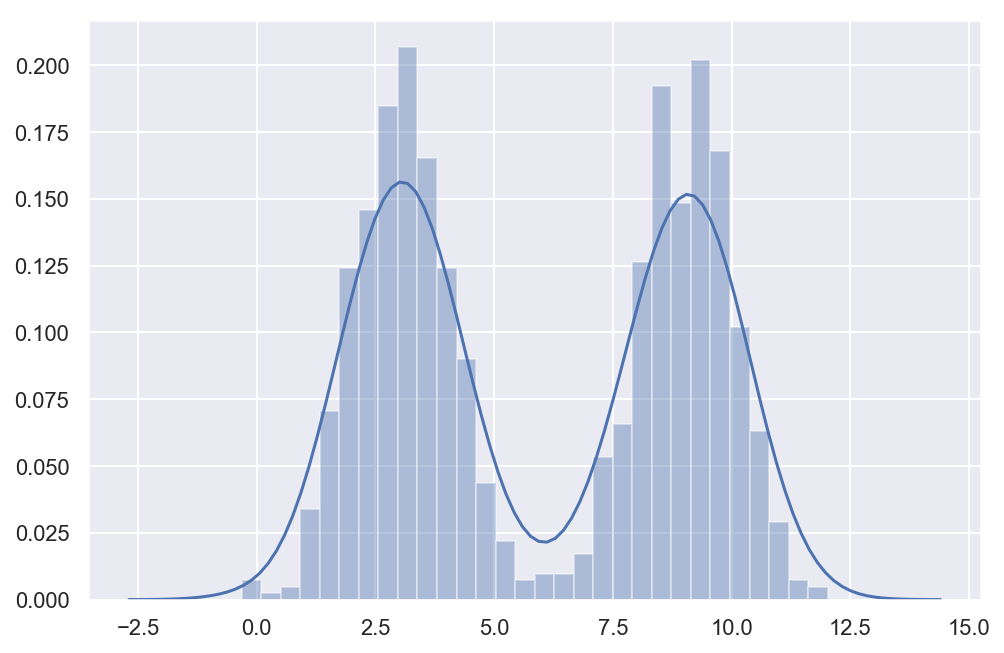

In [185]:
def one_way():
    s = stats.uniform.rvs(size=1000)
    l = len(s[s>0.5])
    data = list(stats.norm.rvs(loc=0+3, scale=1, size=l))
    data.extend(stats.norm.rvs(loc=newm[1]+5, scale=1, size=1000-l))
    sns.distplot(data,bins=30);
def second_way():
    s = stats.uniform.rvs(size=1000)
    l = len(s[s>0.5])
    data = list(stats.norm.rvs(loc=0, scale=1, size=l)+3)
    data.extend(stats.norm.rvs(loc=0, scale=1, size=1000-l)+newm[1]+5)
    sns.distplot(data,bins=30);
one_way()

#### 3.E - BONUS
Use the other one to generate 1000 more points and draw two comparative histograms.


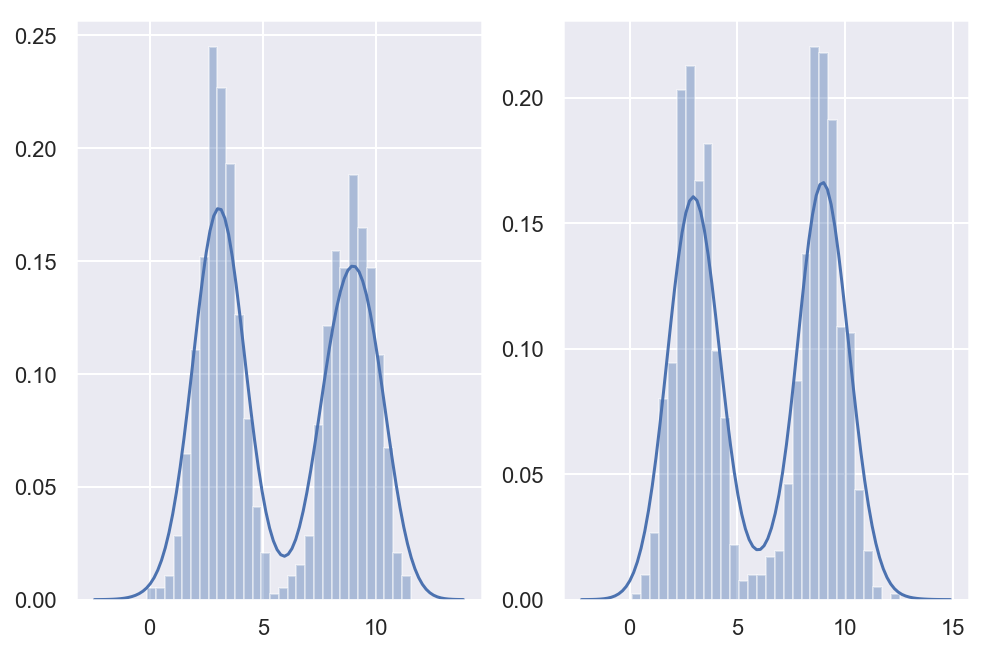

In [190]:
plt.subplot(1, 2, 1)
one_way()
plt.subplot(1, 2, 2)
second_way()

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 50,000 RCU and a standard deviation of 20,000 RCU.

#### 4.A
What percent of people earn less than 40,000 RCU?

In [192]:
def to_print(value):
    print(str(round(value*100,2))+'%')

a = stats.norm(50000,20000).cdf(40000)
to_print(a)

30.85%


#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [17]:
n=stats.norm(50000,20000)
to_print(n.cdf(65000)-n.cdf(45000))

37.21%


#### 4.C
What percent of people earn more than 70,000 RCU?

In [194]:
to_print(1-n.cdf(70000))

15.87%


#### 4.D
The company has 1000 employees. Do you expect that there are any employees that earn more than 120,000 RCU?  

In [26]:

p_to_not_get = n.cdf(120000)
1-p_to_not_get**1000

0.20757399080155292

In [29]:
n.cdf(120000)

0.9997673709209645

It's 20 percent that at least one employee of 1000 will earn that money

### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

In [32]:
import numpy as np
def calcE(N):  
    s=0
    for i in range(1,N+1):
        s+=1/i
    s=N*s
    return s
def approxE(N):
    return N*np.log(N) #ln function
# print(approxE(100)/calcE(100))
# print(approxE(1000)/calcE(1000))
# print(approxE(10000)/calcE(10000))
# print(approxE(10000000)/calcE(10000000))
# print(approxE(100000000)/calcE(100000000))
calcE(100)

518.737751763962

#### 5.B
Write code to compute the exact value of $V(T_{N})$

In [33]:
def calcV(N):
    s=0
    for i in range(1,N+1):
        p=(N-i+1)/N
        s+=(1-p)/p**2
    return s
calcV(100)

15831.101250084967

#### 5.C
Write code to exactly compute $P(T_{20}>60)$

In [36]:
import numpy as np
def to_print(value):
    print(str(round(value*100,2))+'%')
    
from scipy.stats import geom
def g_dist(N,s,k):
    p = (N-s+1)/N
    x = range(0,k+1)
    return [geom.pmf(x, p) for x in x]
def t_prob(N,s,k):
    if s==1:
        return 1
    return np.convolve(g_dist(N,s,k),t_prob(N,s-1,k));

a= t_prob(20,20,60)
to_print(1-sum(a[0:61]))


61.89%


#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

In [52]:
print(calcE(20),calcV(20))

71.95479314287364 566.5105044223355


X := T(20)

E(X) = 72

Var(X) = 567

Pr(|X-72|>=k)<=566/k^2

X-72>=k OR X-72<=-k

X>=k+72 OR X<=72-k

k=-12

Pr(X>=60 OR X<=84)<=3.9

We didn't got something meaningfull by Chebicheff


### Question 6 - More on convolutions

Let n be an integer, not prime. <br>
Find two distributions a and b on the nonnegative integers, both not concentrated at 0 (this is the trivial answer…), such that the convolution of a and b is the equiprobable (uniform) distribution on the set of numbers 0, 1, 2, . . . , n-1. <br>
\* Note: If n is prime this is not possible, but the proof is not so easy. 

In [81]:
#Example for n=8
np.convolve([0.5,0.5],[0.25,0,0.25,0,0.25,0,0.25])

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

For even n

`a~U([0,1]), b~U([0,2,4,...,n-2])`

The distribution of random variable c=a+b will be the convolution of a and b

And for any k 

`P(c=2*k)=P(a=0)*P(b=2k)=0.5*1/(n/2)=1/n`

`P(c=2k+1)=P(a=1)*P(b=2k)=0.5*1/(n/2)=1/n`

For any not prime n

Get the smallest k>1 that satisfy n%k==0

`a~U([0,..,k]), b~U([0,k,2k,3k,..,n-k])`

The distribution of random variable c=a+b will be the convolution of a and b

And for any k 

`P(c=i*k)=P(a=0)*P(b=i*k)=(1/k)*1/(n/k)=1/n`

`P(c=i*k+m)=P(a=m)*P(b=i*k)=(1/k)*1/(n/k)=1/n for any m<k`